# 인공 신경망 소개
- 인공 신경망은 딥러닝의 핵심

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 일관된 출력을 위해 유사난수 초기화
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

## 10.1 생물학적 뉴런에서 인공 뉴런까지

#### 10.1.1 생물학적 뉴런

#### 10.1.2 뉴런을 사용한 논리 연산
- 초기 매우 단순한 인공 신경망은 하나 이상의 이진 입력과 하나의 이진 출력을 가졌으며, 논리곱, 논리합, 논리부정의 간단한 논리 연산을 수행

#### 10.1.3 퍼셉트론
- 퍼셉트론은 가장 간단한 인공 신경망 구조(층이 1개)이며, TLU(tgreshold logic unit)라는 조금 다른 형태의 인공 뉴런을 기반으로 함
- 입력과 출력이 (이진 on/off 값이 아니라) 어떤 숫사고 각각의 입력 연결은 가중치와 연관되어 있음
- TLU는 입력의 가중치 합을 계산한 후 계산된 합에 계단 함수를 적용하여 그 결과를 출력하는데 가장 널리 사용되는 계단 함수는 헤비사이드 계단 함수
- 각 출력 뉴런의 결정 경계는 선형이므로 퍼셉트론도 복잡한 패턴을 학습 못하지만, 훈련 샘플이 선형적으로 구분된다면 알고리즘이 정답에 수렴하는데 이를 퍼셉트론 수렴이론이라고 함
- 퍼셉트론은 클래스 확률을 제공하지 않으며, 일부 간단한 문제(XOR 분류 문제)를 풀 수 없음(다른 선형 분류기도 비슷)
- XOR 분류 문제와 같은 간단한 문제를 풀 수 없는 한계를 퍼셉트론을 쌓아 해결하는 것을 다층 퍼셉트론이라고 함

In [3]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = (iris.target == 0).astype(np.int) # setosa 여부

per_clf = Perceptron(max_iter=100, random_state=42) 
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([1])

##### 설명
- 퍼셉트론 학습 알고리즘은 확률적 경사 하강법과 매우 닮았는데, 사이킷런의 Perceptron 클래스는 매개변수가 loss='perceptron', learning_rate = 'constant', eta0=1(학습률), penalty=None(규제 없음)인 SGDClassifier와 같음
- 클래스 확률을 제공하지 않으며 고정된 임곗값을 기준으로 예측을 함(이런 이유로 로지스틱 회귀를 더 선호함)
- 퍼셉트론은 심각한 약점(XOR 등)이 있었는데, 이는 퍼셉트론을 쌓아 올리면(다층 퍼셉트론) 한계를 뛰어넘을 수 있음

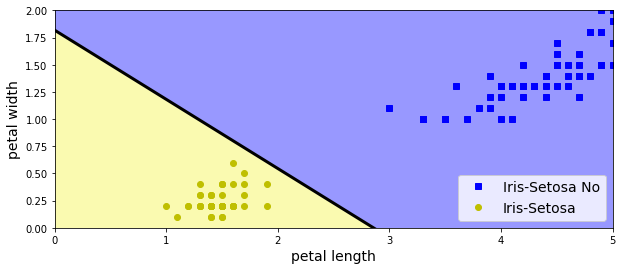

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Iris-Setosa No")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)
plt.show()

#### 10.1.4 다층 퍼셉트론과 역전파
- 다층 퍼셉트론은 입력층 하나와 은닉층이라 불리는 하나 이상의 TLU 층과 마지막 층인 출력층으로 구성(2개 이상의 은닉층을 심층 신경망 DNN이라 함)
- 출력층을 제외한 모든 층은 편향 뉴런을 포함하며 다음 층과 완전히 연결되어 있음
- 다층 퍼셉트론을 훈련시키는 방법으로 역전파 훈련 알고리즘이 개발됐고, 이 알고리즘이 잘 작동되기 위해 계단 함수를 로지스틱 함수로 변환
- 역전파 알고리즘은 로지스틱 함수 외 다른 활성화 함수(대표적으로 하이퍼볼릭 탄젠트 함수, ReLU)를 사용할 수 있음
- 활성화 함수를 소프트맥스 함수로 바꾸면 클래스 추정 확률 확인 가능?(단, 신호가 입력에서 출력으로 한 방향으로만 흐르므로 이런 구조를 피드포워드 신경망(FNN)이라고 함)

In [5]:
# 여러 활성화 함수, 계단 함수 계산식
def logit(z): # 로지스틱 함수
    return 1 / (1 + np.exp(-z))

def relu(z): # ReLU 함수
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001): # 도함수
    return (f(z + eps) - f(z - eps))/(2 * eps)

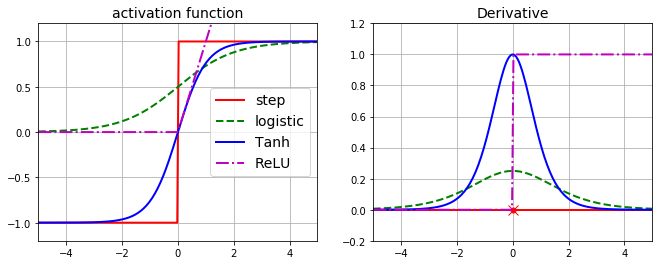

In [6]:
# 활성화 함수와 해당 도함수 그래프
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="step") # 사인 함수
plt.plot(z, logit(z), "g--", linewidth=2, label="logistic") # 로지스틱 함수
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh") # 탄젠트 함수
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU") # ReLU 함수
plt.grid(True) # 격자 생성
plt.legend(loc="center right", fontsize=14) # 범례 생성
plt.title("activation function", fontsize=14) # 제목 생성
plt.axis([-5, 5, -1.2, 1.2]) # 축 범위 지정

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step") # 사인 함수의 도함수 
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit") # 로지그틱 함수의 도함수
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh") # 탄젠트 함수의 도함수
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU") # ReLU 함수의 도함수
plt.grid(True)
plt.title("Derivative", fontsize=14) # 도함수
plt.axis([-5, 5, -0.2, 1.2])
plt.show()

In [7]:
def heaviside(z): # 헤비사이드 함수
    return (z >= 0).astype(z.dtype)

def sigmoid(z): # 시그모이드 함수
    return 1/(1+np.exp(-z))

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

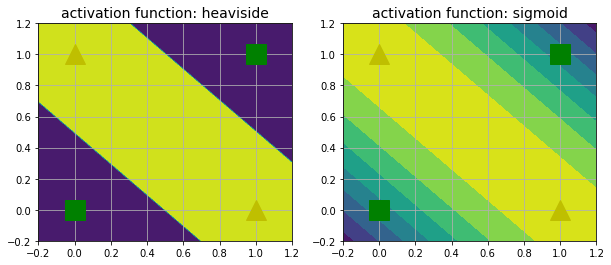

In [8]:
# XOR 문제 그래프
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("activation function: sigmoid", fontsize=14)
plt.grid(True)

## 10.2 텐서플로의 고수준 API로 다층 퍼셉트론 훈련하기

In [9]:
# MNIST 데이터 준비
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data() # keras에서 MNIST 데이터 불러오기
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0 # 28*28의 형태로 만든 후 255 나누기
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0 # 28*28의 형태로 만든 후 255 나누기
y_train = y_train.astype(np.int32) # y_train 데이터 준비
y_test = y_test.astype(np.int32) # y_test 데이터 준비
X_valid, X_train = X_train[:5000], X_train[5000:] # 5,000개 데이터 검증 데이터로
y_valid, y_train = y_train[:5000], y_train[5000:] # 5,000개 데이터 검증 데이터로

C:\Users\Yoo\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Yoo\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Yoo\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Yoo\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type

In [10]:
# Estimator API를 이용(은닉층 2개(뉴런 각각 300개와 100개), 10개의 뉴런을 가진 소프트맥스 출력층으로 구성된 DNN)
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100], n_classes=10, feature_columns=feature_cols) 
# 은닉층 뉴런과 출력층 뉴런(class 수) 설정
input_fn = tf.estimator.inputs.numpy_input_fn(x={"X": X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True)
dnn_clf.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Yoo\\AppData\\Local\\Temp\\tmpqsqiyjx8', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000028255EE53C8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To co

INFO:tensorflow:global_step/sec: 241.315
INFO:tensorflow:loss = 1.1146138, step = 5401 (0.414 sec)
INFO:tensorflow:global_step/sec: 237.807
INFO:tensorflow:loss = 2.0843437, step = 5501 (0.419 sec)
INFO:tensorflow:global_step/sec: 241.035
INFO:tensorflow:loss = 0.4275139, step = 5601 (0.415 sec)
INFO:tensorflow:global_step/sec: 243.088
INFO:tensorflow:loss = 4.1513357, step = 5701 (0.411 sec)
INFO:tensorflow:global_step/sec: 241.443
INFO:tensorflow:loss = 0.6272636, step = 5801 (0.415 sec)
INFO:tensorflow:global_step/sec: 240.207
INFO:tensorflow:loss = 4.714946, step = 5901 (0.416 sec)
INFO:tensorflow:global_step/sec: 215.151
INFO:tensorflow:loss = 0.26440328, step = 6001 (0.465 sec)
INFO:tensorflow:global_step/sec: 242.599
INFO:tensorflow:loss = 0.2598606, step = 6101 (0.411 sec)
INFO:tensorflow:global_step/sec: 235.931
INFO:tensorflow:loss = 0.1110209, step = 6201 (0.424 sec)
INFO:tensorflow:global_step/sec: 230.011
INFO:tensorflow:loss = 1.0499642, step = 6301 (0.435 sec)
INFO:tenso

INFO:tensorflow:global_step/sec: 235.24
INFO:tensorflow:loss = 0.027431488, step = 13601 (0.428 sec)
INFO:tensorflow:global_step/sec: 230.802
INFO:tensorflow:loss = 0.22066364, step = 13701 (0.431 sec)
INFO:tensorflow:global_step/sec: 203.76
INFO:tensorflow:loss = 0.17275521, step = 13801 (0.492 sec)
INFO:tensorflow:global_step/sec: 205.973
INFO:tensorflow:loss = 0.10965613, step = 13901 (0.484 sec)
INFO:tensorflow:global_step/sec: 228.57
INFO:tensorflow:loss = 0.016305124, step = 14001 (0.437 sec)
INFO:tensorflow:global_step/sec: 230.203
INFO:tensorflow:loss = 0.15174088, step = 14101 (0.434 sec)
INFO:tensorflow:global_step/sec: 231.112
INFO:tensorflow:loss = 0.17634718, step = 14201 (0.433 sec)
INFO:tensorflow:global_step/sec: 236.485
INFO:tensorflow:loss = 0.050150603, step = 14301 (0.424 sec)
INFO:tensorflow:global_step/sec: 235.911
INFO:tensorflow:loss = 0.012303281, step = 14401 (0.423 sec)
INFO:tensorflow:global_step/sec: 237.052
INFO:tensorflow:loss = 0.023755178, step = 14501 

INFO:tensorflow:global_step/sec: 232.61
INFO:tensorflow:loss = 0.060581278, step = 21701 (0.430 sec)
INFO:tensorflow:global_step/sec: 229.523
INFO:tensorflow:loss = 0.118196025, step = 21801 (0.435 sec)
INFO:tensorflow:global_step/sec: 241.028
INFO:tensorflow:loss = 0.110727005, step = 21901 (0.415 sec)
INFO:tensorflow:global_step/sec: 236.305
INFO:tensorflow:loss = 0.17835864, step = 22001 (0.424 sec)
INFO:tensorflow:global_step/sec: 233.948
INFO:tensorflow:loss = 0.13684618, step = 22101 (0.427 sec)
INFO:tensorflow:global_step/sec: 229.717
INFO:tensorflow:loss = 0.1442149, step = 22201 (0.436 sec)
INFO:tensorflow:global_step/sec: 202.153
INFO:tensorflow:loss = 0.013770677, step = 22301 (0.495 sec)
INFO:tensorflow:global_step/sec: 225.867
INFO:tensorflow:loss = 0.11667238, step = 22401 (0.442 sec)
INFO:tensorflow:global_step/sec: 232.315
INFO:tensorflow:loss = 0.026804313, step = 22501 (0.430 sec)
INFO:tensorflow:global_step/sec: 228.921
INFO:tensorflow:loss = 0.077776164, step = 2260

INFO:tensorflow:global_step/sec: 225.923
INFO:tensorflow:loss = 0.0044868523, step = 29801 (0.443 sec)
INFO:tensorflow:global_step/sec: 235.12
INFO:tensorflow:loss = 0.007290628, step = 29901 (0.426 sec)
INFO:tensorflow:global_step/sec: 206.574
INFO:tensorflow:loss = 0.0058388794, step = 30001 (0.483 sec)
INFO:tensorflow:global_step/sec: 230.685
INFO:tensorflow:loss = 0.0010376498, step = 30101 (0.435 sec)
INFO:tensorflow:global_step/sec: 230.117
INFO:tensorflow:loss = 0.0151736755, step = 30201 (0.434 sec)
INFO:tensorflow:global_step/sec: 233.711
INFO:tensorflow:loss = 0.029308487, step = 30301 (0.428 sec)
INFO:tensorflow:global_step/sec: 220.685
INFO:tensorflow:loss = 0.07492186, step = 30401 (0.453 sec)
INFO:tensorflow:global_step/sec: 223.42
INFO:tensorflow:loss = 0.009709636, step = 30501 (0.448 sec)
INFO:tensorflow:global_step/sec: 237.04
INFO:tensorflow:loss = 0.025150318, step = 30601 (0.423 sec)
INFO:tensorflow:global_step/sec: 216.334
INFO:tensorflow:loss = 0.0149984285, step

INFO:tensorflow:global_step/sec: 234.087
INFO:tensorflow:loss = 0.0006153042, step = 37901 (0.427 sec)
INFO:tensorflow:global_step/sec: 233.898
INFO:tensorflow:loss = 0.012862221, step = 38001 (0.428 sec)
INFO:tensorflow:global_step/sec: 231.78
INFO:tensorflow:loss = 0.0035608362, step = 38101 (0.432 sec)
INFO:tensorflow:global_step/sec: 230.5
INFO:tensorflow:loss = 0.0021287017, step = 38201 (0.433 sec)
INFO:tensorflow:global_step/sec: 237.601
INFO:tensorflow:loss = 0.0027330625, step = 38301 (0.421 sec)
INFO:tensorflow:global_step/sec: 235.924
INFO:tensorflow:loss = 0.02338286, step = 38401 (0.424 sec)
INFO:tensorflow:global_step/sec: 224.814
INFO:tensorflow:loss = 0.017274879, step = 38501 (0.445 sec)
INFO:tensorflow:global_step/sec: 226.918
INFO:tensorflow:loss = 0.0022548707, step = 38601 (0.441 sec)
INFO:tensorflow:global_step/sec: 215.434
INFO:tensorflow:loss = 0.015913028, step = 38701 (0.466 sec)
INFO:tensorflow:global_step/sec: 224.878
INFO:tensorflow:loss = 0.023499385, step

In [11]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(x={"X": X_test}, y=y_test, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-05-14T10:38:07Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\Yoo\AppData\Local\Temp\tmpqsqiyjx8\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-05-14-10:38:08
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9805, average_loss = 0.103211366, global_step = 44000, loss = 13.06473
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 44000: C:\Users\Yoo\AppData\Local\Temp\tmpqsqiyjx8\model.ckpt-44000


In [12]:
eval_results

{'accuracy': 0.9805,
 'average_loss': 0.103211366,
 'loss': 13.06473,
 'global_step': 44000}

In [13]:
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Yoo\AppData\Local\Temp\tmpqsqiyjx8\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'logits': array([  0.49623805,  -1.4348882 ,   2.653056  ,   9.150618  ,
         -4.0813346 ,  -1.1133194 , -14.151529  ,  21.337473  ,
          4.2094665 ,   2.5713623 ], dtype=float32),
 'probabilities': array([8.8871960e-10, 1.2885068e-10, 7.6817166e-09, 5.0969898e-06,
        9.1358657e-12, 1.7772256e-10, 3.8665172e-16, 9.9999487e-01,
        3.6424975e-08, 7.0791177e-09], dtype=float32),
 'class_ids': array([7], dtype=int64),
 'classes': array([b'7'], dtype=object)}

In [14]:
# tf.contrib.learn을 사용(은닉층 2개(뉴런 각각 300개와 100개), 10개의 뉴런을 가진 소프트맥스 출력층으로 구성된 DNN
# tensorflow.contrib 패키지는 유용한 함수를 많이 포함하고 있으나 실험적이며 핵심 API로 편입된다는 보장이 없음
config = tf.contrib.learn.RunConfig(tf_random_seed=42) # 난수 고정

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300,100], n_classes=10, feature_columns=feature_cols, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # if TensorFlow >= 1.1
tf.logging.set_verbosity(tf.logging.INFO)
dnn_clf.fit(X_train, y_train, batch_size=50, steps=40000)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please feed input to tf.data to support dask.
Instructions for updating:
Please access pandas data directly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please convert numpy dtypes explicitly.
Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimat

INFO:tensorflow:loss = 0.088726476, step = 2001 (0.470 sec)
INFO:tensorflow:global_step/sec: 233.516
INFO:tensorflow:loss = 0.035621196, step = 2101 (0.427 sec)
INFO:tensorflow:global_step/sec: 229.445
INFO:tensorflow:loss = 0.028010983, step = 2201 (0.437 sec)
INFO:tensorflow:global_step/sec: 225.777
INFO:tensorflow:loss = 0.059946653, step = 2301 (0.442 sec)
INFO:tensorflow:global_step/sec: 231.187
INFO:tensorflow:loss = 0.041797787, step = 2401 (0.433 sec)
INFO:tensorflow:global_step/sec: 234.804
INFO:tensorflow:loss = 0.07843343, step = 2501 (0.426 sec)
INFO:tensorflow:global_step/sec: 233.713
INFO:tensorflow:loss = 0.058526658, step = 2601 (0.429 sec)
INFO:tensorflow:global_step/sec: 224.839
INFO:tensorflow:loss = 0.02244895, step = 2701 (0.444 sec)
INFO:tensorflow:global_step/sec: 211.646
INFO:tensorflow:loss = 0.040300015, step = 2801 (0.472 sec)
INFO:tensorflow:global_step/sec: 235.367
INFO:tensorflow:loss = 0.07689805, step = 2901 (0.425 sec)
INFO:tensorflow:global_step/sec: 2

INFO:tensorflow:global_step/sec: 228.819
INFO:tensorflow:loss = 0.007325672, step = 10201 (0.437 sec)
INFO:tensorflow:global_step/sec: 233.405
INFO:tensorflow:loss = 0.0031493169, step = 10301 (0.428 sec)
INFO:tensorflow:global_step/sec: 227.1
INFO:tensorflow:loss = 0.0024378947, step = 10401 (0.440 sec)
INFO:tensorflow:global_step/sec: 212.533
INFO:tensorflow:loss = 0.0045912205, step = 10501 (0.470 sec)
INFO:tensorflow:global_step/sec: 234.486
INFO:tensorflow:loss = 0.013533574, step = 10601 (0.426 sec)
INFO:tensorflow:global_step/sec: 232.869
INFO:tensorflow:loss = 0.012932664, step = 10701 (0.430 sec)
INFO:tensorflow:global_step/sec: 242.824
INFO:tensorflow:loss = 0.00313841, step = 10801 (0.412 sec)
INFO:tensorflow:global_step/sec: 239.875
INFO:tensorflow:loss = 0.0022060277, step = 10901 (0.416 sec)
INFO:tensorflow:global_step/sec: 239.688
INFO:tensorflow:loss = 0.021697009, step = 11001 (0.417 sec)
INFO:tensorflow:global_step/sec: 231.405
INFO:tensorflow:loss = 0.004743114, step

INFO:tensorflow:global_step/sec: 223.811
INFO:tensorflow:loss = 0.0041694795, step = 18201 (0.446 sec)
INFO:tensorflow:global_step/sec: 222.765
INFO:tensorflow:loss = 0.014236108, step = 18301 (0.451 sec)
INFO:tensorflow:global_step/sec: 232.101
INFO:tensorflow:loss = 0.0024293188, step = 18401 (0.430 sec)
INFO:tensorflow:global_step/sec: 221.612
INFO:tensorflow:loss = 0.0004953749, step = 18501 (0.450 sec)
INFO:tensorflow:global_step/sec: 230.065
INFO:tensorflow:loss = 0.0020278317, step = 18601 (0.436 sec)
INFO:tensorflow:global_step/sec: 230.546
INFO:tensorflow:loss = 0.0008729042, step = 18701 (0.434 sec)
INFO:tensorflow:global_step/sec: 231.518
INFO:tensorflow:loss = 0.0020719254, step = 18801 (0.432 sec)
INFO:tensorflow:global_step/sec: 228.415
INFO:tensorflow:loss = 0.0030182195, step = 18901 (0.439 sec)
INFO:tensorflow:global_step/sec: 206.325
INFO:tensorflow:loss = 0.00086497545, step = 19001 (0.484 sec)
INFO:tensorflow:global_step/sec: 217.031
INFO:tensorflow:loss = 0.0004761

INFO:tensorflow:global_step/sec: 230.605
INFO:tensorflow:loss = 0.00058605644, step = 26201 (0.433 sec)
INFO:tensorflow:global_step/sec: 224.344
INFO:tensorflow:loss = 0.0013152588, step = 26301 (0.446 sec)
INFO:tensorflow:global_step/sec: 212.163
INFO:tensorflow:loss = 0.0012538442, step = 26401 (0.471 sec)
INFO:tensorflow:global_step/sec: 241.069
INFO:tensorflow:loss = 0.0008833681, step = 26501 (0.414 sec)
INFO:tensorflow:global_step/sec: 238.75
INFO:tensorflow:loss = 0.0005863348, step = 26601 (0.421 sec)
INFO:tensorflow:global_step/sec: 235.092
INFO:tensorflow:loss = 1.8267152e-05, step = 26701 (0.425 sec)
INFO:tensorflow:global_step/sec: 214.705
INFO:tensorflow:loss = 0.00047921657, step = 26801 (0.465 sec)
INFO:tensorflow:global_step/sec: 234.782
INFO:tensorflow:loss = 0.00085007906, step = 26901 (0.426 sec)
INFO:tensorflow:global_step/sec: 235.236
INFO:tensorflow:loss = 0.0006512004, step = 27001 (0.424 sec)
INFO:tensorflow:global_step/sec: 213.287
INFO:tensorflow:loss = 0.0005

INFO:tensorflow:global_step/sec: 213.987
INFO:tensorflow:loss = 0.0009375557, step = 34201 (0.468 sec)
INFO:tensorflow:global_step/sec: 228.469
INFO:tensorflow:loss = 0.00025043814, step = 34301 (0.438 sec)
INFO:tensorflow:global_step/sec: 204.445
INFO:tensorflow:loss = 0.0005134255, step = 34401 (0.488 sec)
INFO:tensorflow:global_step/sec: 243.947
INFO:tensorflow:loss = 0.0006037497, step = 34501 (0.411 sec)
INFO:tensorflow:global_step/sec: 233.607
INFO:tensorflow:loss = 0.00044785836, step = 34601 (0.428 sec)
INFO:tensorflow:global_step/sec: 224.333
INFO:tensorflow:loss = 0.0013332723, step = 34701 (0.445 sec)
INFO:tensorflow:global_step/sec: 224.78
INFO:tensorflow:loss = 0.0006306024, step = 34801 (0.445 sec)
INFO:tensorflow:global_step/sec: 234.616
INFO:tensorflow:loss = 0.00034592106, step = 34901 (0.427 sec)
INFO:tensorflow:global_step/sec: 237.587
INFO:tensorflow:loss = 0.00047174486, step = 35001 (0.421 sec)
INFO:tensorflow:global_step/sec: 226.338
INFO:tensorflow:loss = 0.0009

SKCompat()

In [15]:
from sklearn.metrics import accuracy_score

y_pred = dnn_clf.predict(X_test)
accuracy_score(y_test, y_pred['classes']) # 앞선 장에서 했던 어떤 모델보다 좋은 성능을 보임

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Yoo\AppData\Local\Temp\tmpbp59id4a\model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


0.9817

In [16]:
from sklearn.metrics import log_loss

y_pred_proba = y_pred['probabilities']
log_loss(y_test, y_pred_proba)

0.07154455655886134

## 10.3 텐서플로의 저수준 API로 심층 신경망 훈련하기
- 네트워크 구조를 더 상세히 제어하고 싶다면 텐서플로의 저수준 파이썬 API가 더 나을지 모르므로 저수준 API로 이전과 같은 모델을 만들고 MNIST 데이터셋에서 훈련하기 위해 미니배치 경사 하강법을 구현(첫 번째 스텝은 텐서플로 계산 그래프를 만드는 구성 단계이고, 두 번째 스텝은 실제로 이 그래프를 실행해 모델을 훈련하는 실행 단계)

#### 10.3.1 구성 단계

In [17]:
import tensorflow as tf

n_inputs = 28*28  # MNIST 이미지 구조
n_hidden1 = 300 # 1번 은닉층 뉴런의 수
n_hidden2 = 100 # 2번 은닉층 뉴런의 수
n_outputs = 10 # 출력층의 수(class 10개)

In [18]:
# 입력층 만들기
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X") # 플레이스 홀더 노드 생성(자료형, 구조) ==> 입력층 역할
y = tf.placeholder(tf.int32, shape=(None), name="y") # 플레이스 홀더 노드 생성(자료형, 구조)

In [19]:
# 은닉층 만들기
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name): # 이름 범위 사용
        n_inputs = int(X.get_shape()[1]) # 28*28=784(입력 특성의 수)
        stddev = 2 / np.sqrt(n_inputs) # 2 / root(28*28)=1/14(표준편차)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev) # truncated_normal ==> 절단정규분포로부터의 난수값 반환
        W = tf.Variable(init, name="kernel") # 변수 노드(절단정규분포로부터의 난수값을 받음) => 가중치
        b = tf.Variable(tf.zeros([n_neurons]), name="bias") # 변수 노드(뉴런마다 하나의 편향을 갖도록 하고 0으로 초기화)
        Z = tf.matmul(X, W) + b # 그래프 생성(층의 모든 뉴런과 배치에 있는 모든 샘플에 대해 가중치 합에 편향을 더하는 계산을 한방에)
        if activation is not None: # 활성화 함수 True면
            return activation(Z) # 활성화 함수 시행 후 반환
        else:
            return Z # 그냥 반환

# 모든 은닉층의 가중치 설정을 무작위로 초기화하는 것이 중요(일괄적으로 0으로 설정 시 모든 뉴런의 오차 그래디언트가 같게 됨=뉴런 1개취급)

In [20]:
# 신경망 구조 만들기(neuron_layer대신 tf.layers.dense라면 모든 입력이 은닉층에 있는 모든 뉴런과 완전 연결 층을 만듬)
with tf.name_scope("dnn"): # 이름 범위 사용
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs") # 활성화 함수로 들어가기 직전의 신경망 출력

In [21]:
# 비용 함수 만들기(크로스 엔트로피는 모델이 타깃 클래스에 대해 낮은 확률을 추정하지 않도록 제약을 가함)
# 크로스 엔트로피 함수중 sparse_softmax_cross_entropy_with_logits는 logit을 기반으로 크로스 엔트로피를 계산
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits) # 각 샘플의 크로스 엔트로피를 담은 1D 텐서 반환
    loss = tf.reduce_mean(xentropy, name="loss") # 모든 샘플에 대한 크로스 엔트로피 평균 계산

In [22]:
# 훈련 알고리즘 만들기(9장처럼 GradientDescentOptimizer를 사용)
learning_rate = 0.01 # 학습률

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss) # 비용 함수의 최소값 선택

In [23]:
# 모델 평가 방법 만들기(간단하게 정확도를 이용)
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1) # in_top_k(예측값,타깃,k) ==> 타깃 레이블의 예측값이 크기순으로 k번에 안에 들면 True
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32)) # tf.cast ==> 텐서를 새로운 형태로 캐스팅

In [24]:
init = tf.global_variables_initializer() # 변수 초기화 노드 생성
saver = tf.train.Saver() # 모델 저장을 위한 saver 객체 생성

#### 10.3.2 실행 단계

In [25]:
# epoch, batch 설정
n_epochs = 40
batch_size = 50

In [26]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X)) # X 범위에 대해 랜덤한 순열 생성
    n_batches = len(X) // batch_size # 배치 개수 구하기
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch # yield ==> 값을 반환하는 return 대신 제너레이터를 반환

In [27]:
with tf.Session() as sess:
    init.run() # 변수 초기화
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size): # shuffle_batch 사용자 정의 함수 사용
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "배치 데이터 정확도:", acc_batch, "검증 세트 정확도:", acc_valid)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 배치 데이터 정확도: 0.9 검증 세트 정확도: 0.9146
1 배치 데이터 정확도: 0.92 검증 세트 정확도: 0.936
2 배치 데이터 정확도: 0.96 검증 세트 정확도: 0.945
3 배치 데이터 정확도: 0.92 검증 세트 정확도: 0.9512
4 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.956
5 배치 데이터 정확도: 0.96 검증 세트 정확도: 0.9566
6 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9612
7 배치 데이터 정확도: 0.94 검증 세트 정확도: 0.9632
8 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9652
9 배치 데이터 정확도: 0.96 검증 세트 정확도: 0.966
10 배치 데이터 정확도: 0.92 검증 세트 정확도: 0.9686
11 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9692
12 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.967
13 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9708
14 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9714
15 배치 데이터 정확도: 0.94 검증 세트 정확도: 0.973
16 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.973
17 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.974
18 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9748
19 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9742
20 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.975
21 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9756
22 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.977
23 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9752
24 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9768
25 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9766
26 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9778
27 

#### 10.3.3 신경망 사용하기
- 신경망을 훈련시키고 나면 이를 사용하여 예측을 할 수 있는데, 이때 구성 단계는 그대로 사용 가능하나 실행 단계는 바꿔야 함

In [28]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # 디스크로부터 모델 파라미터 읽어들이기(또는 save_path를 사용합니다)
    X_new_scaled = X_test[:20] # 새로운 이미지(0에서 1사이로 스케일 조정)
    Z = logits.eval(feed_dict={X: X_new_scaled}) # logits 노드를 평가(클래스 확률을 알고 싶다면 로짓에 softmax 함수를 적용)
    y_pred = np.argmax(Z, axis=1) # 로짓 값이 가장 큰 클래스를 선택 => 클래스 예측

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [29]:
print("예측 클래스:", y_pred)
print("진짜 클래스:", y_test[:20])

예측 클래스: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
진짜 클래스: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [30]:
# neuron_layer() 대신 dense() 사용
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

# 기존 코드 neuron_layer()에서 dense() 사용
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    y_proba = tf.nn.softmax(logits)

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

n_epochs = 20
n_batches = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "배치 데이터 정확도:", acc_batch, "검증 세트 정확도:", acc_valid)

    save_path = saver.save(sess, "./my_model_final.ckpt")

Instructions for updating:
Use keras.layers.dense instead.
0 배치 데이터 정확도: 0.9 검증 세트 정확도: 0.9024
1 배치 데이터 정확도: 0.92 검증 세트 정확도: 0.9254
2 배치 데이터 정확도: 0.94 검증 세트 정확도: 0.9372
3 배치 데이터 정확도: 0.9 검증 세트 정확도: 0.9416
4 배치 데이터 정확도: 0.94 검증 세트 정확도: 0.9472
5 배치 데이터 정확도: 0.94 검증 세트 정확도: 0.9512
6 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9546
7 배치 데이터 정확도: 0.94 검증 세트 정확도: 0.9612
8 배치 데이터 정확도: 0.96 검증 세트 정확도: 0.962
9 배치 데이터 정확도: 0.94 검증 세트 정확도: 0.9648
10 배치 데이터 정확도: 0.92 검증 세트 정확도: 0.9658
11 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9668
12 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9686
13 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9702
14 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9696
15 배치 데이터 정확도: 0.94 검증 세트 정확도: 0.9722
16 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9726
17 배치 데이터 정확도: 1.0 검증 세트 정확도: 0.9728
18 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9748
19 배치 데이터 정확도: 0.98 검증 세트 정확도: 0.9752


## 10.4 신경망 하이퍼파라미터 튜닝하기
- 신경망의 유연성은 중요한 단점이 되기도 함(즉, 조절해야 할 하이퍼파라미터가 많아짐)
- 기존의 모델 하이퍼파라미터 설정처럼 그리드 서치를 사용할 수 있으나 대규모 데이터에서는 신경망 훈련에 오래 걸리므로 랜덤 탐색을 더 선호
- 또 다른 방법으로는 좋은 하이퍼파라미터 조합을 빠르게 찾아주는 복잡한 알고리즘을 구현한 오스카(http://oscar.calldesk.ai/)같은 도구를 사용

#### 10.4.1 은닉층의 수
- 많은 문제는 은닉층 한 개로도 쓸 만한 결과를 얻을 수 있음(은닉층 하나의 다중 퍼셉트론으로도 아주 복잡한 함수도 모델링이 가능)
- 심층 신경망은 복잡한 함수를 모델링하는데 얕은 신경망보다 더 적은 수의 뉴런을 사용하므로 더 빠르게 훈련됨(데이터의 구조가 계층적 구조인 경우가 많기 때문)

#### 10.4.2 은닉층의 뉴런의 수
- 입력층과 출력층의 뉴런 수는 해당 작업에 필요한 입력과 출력의 형태에 따라 결정(입력층: 특성의 수, 은닉층: 결과값)
- 은닉층의 구성 방식은 각 층의 뉴런을 점점 줄여서 깔때기처럼 구성(저수준의 많은 특성이 고수준의 적은 특성으로 합침)
- 하지만 요즘은 모든 은닉층에 같은 크기를 사용하는데, 이 경우 하이퍼파라미터가 층마다 따로 있자 않아서 전체를 한 번에 조정 가능
- 과대적합이 시작하기 전까지 층의 개수 or 뉴럼의 개수를 점진적으로 늘림(일반적으로 뉴런보다 층을 늘리는 것이 이득)
- 단순 접근 방식은 실제 필요한 것보다 더 많은 층과 뉴런을 선택하여 과대적합되지 않도록 조기 종료 기법을 사용하는 것

#### 10.4.3 활성화 함수
- 대부분의 경우 은닉층에 ReLU 활성화 함수를 사용(계산이 다른 활성화 함수보다 조금 빠르고, 입력값이 클 때 특정값에 수렴하지 않아 경사 하강법이 평편한 지역에서 심하게 지체되지 않음)
- 출력층에서는 소프트맥스 활성화 함수가 일반적으로 분류 작업에 좋은 선택(단, 클래스가 상호 배타적일 경우), 회귀에서는 사용하지 않음

## 10.5 연습문제

#### 1. ([그림 10-3]에 있는 것과 같은) 초창기 인공 뉴런을 사용해 A+B(+는 XOR 연산)를 계산하는 인공신경망을 그려보세요
- 생략

#### 2. 고전적인 퍼셉트론(즉, 퍼셉트론 훈련 알고리즘으로 훈련된 단일 TLU)보다 로지스틱 회귀 분류기가 일반적으로 선호되는 이유는 무엇인가요? 퍼셉트론을 어떻게 수정하면 로지스틱 회귀 분류기와 동등하게 만들 수 있나요?
- 고전적인 퍼셉트론은 데이터셋이 선형적으로 구분될 때만 수렴하고 클래스의 확률을 추정할 수 없습니다. 이와는 반대로 로지스틱 회귀 분류기는 데이터셋이 선형적으로 구분되지 못해도 좋은 솔루션으로 수렴하고 클래스 확률을 출력합니다. 퍼셉트론의 활성화 함수를 로지스틱 활성화 함수로 (또는 여러 개의 뉴런일 경우 소프트맥스 활성화 함수로) 바꾸고, 경사 하강법을 사용하여 (또는 크로스 엔트로피 같은 비용 함수를 최소화하는 다른 최적화 알고리즘을 사용하여) 훈련시키면 로지스틱 회귀 분류기와 동일하게 됩니다.

#### 3. 왜 초창기의 다층 퍼셉트론을 훈련시킬 때 로지스틱 활성화 함수가 핵심 요소였나요?
- 로지스틱 활성화 함수의 도함수는 어디에서나 0이 아니어서 경사 하강법이 항상 경사를 따라 이동할 수 있으므로 초창기 MLP의 핵심 요소였습니다. 활성화 함수가 계단 함수일 때는 경사가 없기 때문에 경사 하강법이 이동할 수 없습니다.

#### 4. 유명한 활성화 함수 네 가지는 무엇인가요?
- 계단 함수, 로지스틱 함수, 하이퍼볼릭 탄젠트, ReLU. ELU와 ReLU의 다른 변종은 11장을 참조

#### 5. 10개의 통과 뉴런으로 된 입력층, 50개의 뉴런으로 된 은닉층, 그리고 3개의 뉴런으로 된 출력층으로 구성된 다층 퍼셉트론이 있다고 가정합시다. 모든 뉴런은 ReLU 활성화 함수를 사용합니다.
1. 입력 행렬 X의 크기는 얼마인가요?
2. 은닉층의 가중치 벡터 W(h)와 편향 벡터 b(h)의 크기는 얼마인가요?
3. 출력층의 가중치 벡터 W(o)와 편향 벡터 b(o)의 크기는 얼마인가요?
4. 네트워크의 출력 행렬 Y의 크기는 얼마인가요?
5. X, W(h), b(h), W(o), b(o)의 함수로 네트워크의 출력 행렬 Y를 계산하는 식을 써보세요.

#### 답변
1. 입력 행렬 X의 크기는 m*10입니다. m은 훈련 배치의 크기를 나타냅니다.
2. 은닉층의 가중치 벡터 W(h)의 크기는 10*50이고 편향 벡터 b(h)의 길이는 50입니다.
3. 출력층의 가중치 벡터 W(o)의 크기는 50*3이고 편향 벡터 b(o)의 길이는 3입니다.
4. 네트워크의 출력 행렬 Y의 크기는 m*3입니다.
5. Y=ReLU(ReLU(X*W(h)+b(h))*W(o)+b(o)). ReLU 함수는 행렬에 있는 음수를 무조건 0으로 만듭니다. 편향 벡터를 행렬에 더하면 행렬의 모든 행에 덧셈이 각기 적용되는 브로드캐스팅이 일어납니다.

#### 6. 스팸 메일을 분류하기 위해서는 출력층에 몇 개의 뉴런이 필요할까요? 출력층에 어떤 활성화 함수를 사용해야 할까요? MNIST 문제라면 출력층에 어떤 활성화 함수를 사용하고 뉴런은 몇 개가 필요할까요? 2장에서 본 주택 가격 예측용 네트워크에 대해 같은 질문의 답을 찾아보세요.
- 스팸 메일을 분류하기 위해서는 신경망의 출력층에 하나의 뉴런만 필요합니다. 예를 들어 이메일이 스팸일 확률을 출력합니다.확률을 추정할 때 일반적으로 출력층에 로지스틱 활성화 함수를 사용합니다. MNIST 문제하면 출력층에 10개의 뉴런이 필요하고, 다중 클래스 환경에서 클래스마다 하나의 확률을 출력하기 위해 로지스틱 함수를 소프트맥스 활성화 함수로 바꾸어야 합니다. 2장에서처럼 주택 가격을 예측하는 신경망을 만들고 싶다면 출력층에 활성화 함수가 없는 출력 뉴런 하나가 필요합니다.

#### 7. 역전파란 무엇이고 어떻게 작동하나요? 역전파의 후진 모드 자동 미분의 차이점은 무엇인가요?
- 역전파는 인공 신경망을 훈련시키는 하나의 기법입니다. 먼저 모델의 모든 하이퍼라마미터(모든 가중치와 편향)에 대한 비용 함수의 그래디언트를 계산하고, 이 그래디언트를 사용해 경사 하강법 스템을 수행합니다. 역전파 단계는 모델 파라미터가 비용 함수를 최소하하는 값으로 수렴할 때까지 훈련 배치에서 일반적으로 수천 혹은 수백만 번 수행됩니다. 그래디언트를 계산하기 위해 역전파는 후진 모드 자동 미분을 사용합니다. 후진 모드 자동 미분은 계산 그래프의 정방향 계산에서 현재 훈련 배치에 대한 모든 노드의 값을 구합니다. 그다음에 역방향 계산에서 한번에 모든 그래디언트를 구합니다. 그렇다면 우엇이 다른걸까요? 역전파는 그래디언트 계산과 경사 하강법 스템을 여러 번 수행하여 인공 신경망을 훈련시키는 전체 프로세스를 의미합니다. 이와 다르게 후진 모드 자동 미분은 그래디언트를 효과적으로 계산하는 하나의 기법으로 역전파에서 사용됩니다.

#### 8. 다층 퍼셉트론에서 조정할 수 있는 하이퍼파라미터를 모두 나열해보새요. 훈련 데이터에 다층 퍼셉트론이 과대적합되었다면 이를 해결하기 위해 하이퍼파라미터를 어떻게 조정해야 할까요?
- 기본 MLP에서 바꿀 수 있는 하이퍼파라미터는 은닉층 수, 각 은닉층의 뉴런의 수, 각 은닉층과 출력층에서 사용하는 활성화 함수입니다. 일반적으로 ReLU가 은닉층의 활성화 함수 기본값으로 좋습니다. 출력층에서는 일반적으로 이진 분류에서는 로지스틱 활성화 함수, 다중 분류에서는 소프트맥스 활성화 함수를 사용하고 회귀에서는 활성화 함수를 적용하지 않습니다. MLP가 훈련 데이터에 과대적합되었다면 은닉층 수와 각 은닉층에 있는 뉴런의 수를 줄여볼 수 있습니다.

#### 9. 깊은 다층 퍼셉트론을 MNIST 데이터셋에 훈련시키고 98% 정확도를 얻을 수 있는지 확인해보세요. 9장의 마지막 연습문제에서와 같이 모든 부가 기능을 추가해보세요(즉, 체크포인트를 저장하고, 중지되었을 때 마지막 체크포인트를 복원하고, 서머리를 추가하고, 텐서보드를 사용해 학습 곡선을 그려보세요).